### 1. Importing the required Libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Reading the dataset.

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

# fetching dataset from the IBM Cloud Object Storage

def __iter__(self): 
    return 0

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3pNshuPriYALQ7N6jXbWq8FxibFfgv72PoYnKGk8O2ll',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-kxqyu0b9oyy4qf'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

admission = pd.read_csv(body)

In [3]:
admission.head() # to see the top five records of the data sets

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.shape # to  see what is the shape of data_set our data set has 400 records and 9 fields

(400, 9)

In [5]:
admission.columns #to see the name of the fields 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
admission.describe() # to see the mathematical values of the data sets i.e mean,standar_deviation ,minimum_value,maximum_value,counts etc.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admission.info() #to see the type of values in every fields i.e int ,float etc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
admission.isnull().sum() # to see that if dataset has any null_values or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 3. Finding the dependent and independent variable.

In [9]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1) #input data_set
X.shape

(400, 7)

In [10]:
y=admission['Chance of Admit '] #output labels
y.shape

(400,)

In [11]:
admission.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
286,287,336,118,5,4.5,4.0,9.19,1,0.92
178,179,309,108,3,2.5,3.0,8.12,0,0.72
349,350,313,101,3,2.5,3.0,8.04,0,0.62
258,259,326,102,4,5.0,5.0,8.76,1,0.77
368,369,298,92,1,2.0,2.0,7.88,0,0.51


### 4. Data Visualization

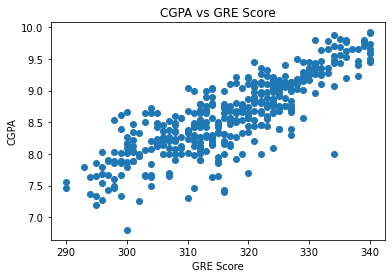

In [12]:
plt.scatter(admission['GRE Score'],admission['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

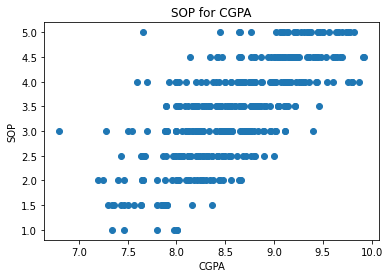

In [13]:
plt.scatter(admission['CGPA'],admission['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

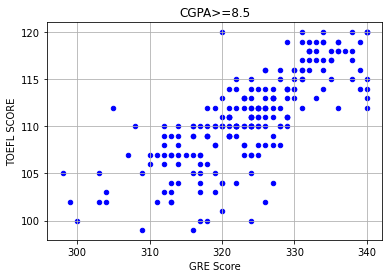

In [14]:
admission[admission.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

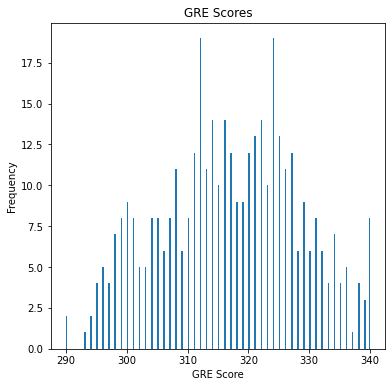

In [15]:
admission["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

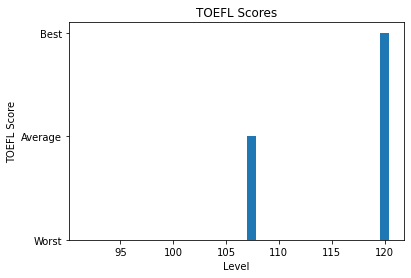

In [16]:

p = np.array([admission["TOEFL Score"].min(),admission["TOEFL Score"].mean(),admission["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

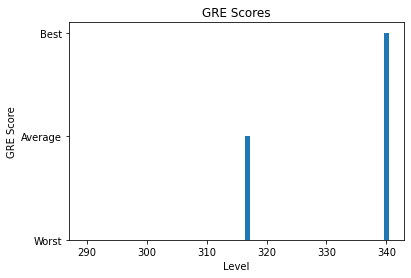

In [17]:

g = np.array([admission["GRE Score"].min(),admission["GRE Score"].mean(),admission["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

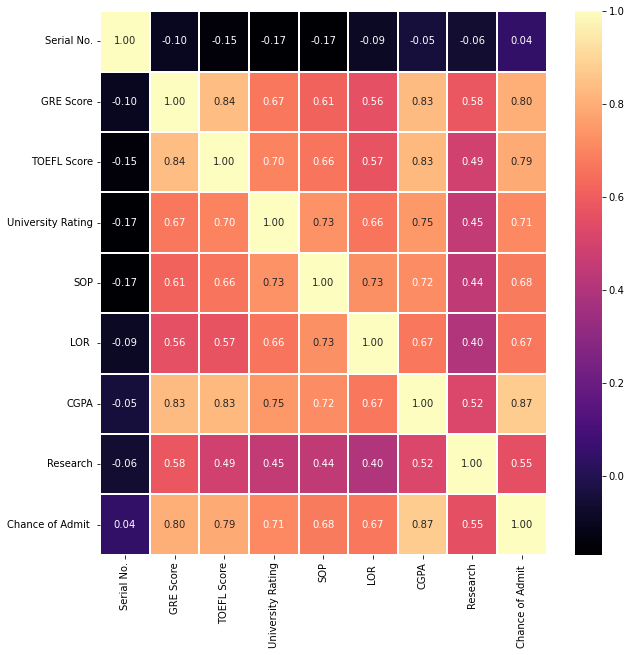

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

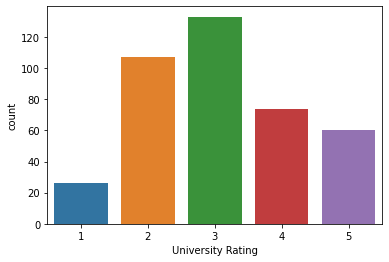

In [19]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

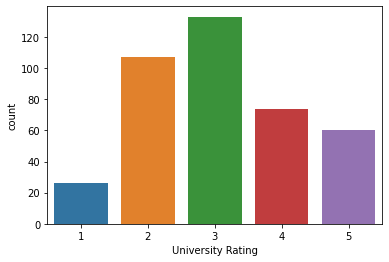

In [20]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

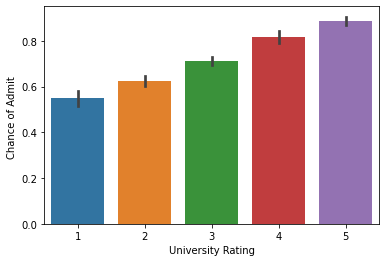

In [21]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=admission)

### 5. Train Test splitting.

In [22]:
#splittin the input data(x) and output labels(y) into train data and test data 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # test_size defins the volume of train data and test data here 0.2 means 20% of the data belongs to the test data

In [23]:
X_train.shape

(320, 7)

In [24]:
X_test.shape

(80, 7)

### 6. Data Preprocessing.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns].values)
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns].values)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
327,0.10,0.321429,0.25,0.375,0.25,0.339744,0.0
70,0.84,0.928571,1.00,1.000,1.00,0.910256,1.0
74,0.48,0.500000,0.50,0.500,1.00,0.673077,0.0
227,0.44,0.642857,0.25,0.625,0.50,0.554487,0.0
114,0.42,0.464286,0.50,0.625,0.50,0.528846,1.0


### 7. Selecting the ML model.

In [26]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)
y_pred = rgr.predict(X_test)
print(y_pred)

[0.8846 0.6333 0.8823 0.4669 0.8032 0.6628 0.6489 0.9401 0.7437 0.9327
 0.6256 0.7544 0.7441 0.6285 0.7181 0.6467 0.7473 0.7674 0.6617 0.8457
 0.6432 0.7855 0.7492 0.7041 0.7248 0.5209 0.7501 0.638  0.9178 0.5156
 0.4658 0.6457 0.6726 0.7738 0.6781 0.9072 0.6892 0.6986 0.7408 0.6447
 0.6665 0.7042 0.9308 0.861  0.921  0.4817 0.7239 0.7424 0.6736 0.9409
 0.7397 0.7019 0.7659 0.5393 0.9284 0.7792 0.7115 0.6161 0.8693 0.7163
 0.6403 0.7473 0.688  0.958  0.4696 0.4655 0.6858 0.7075 0.5534 0.7411
 0.8129 0.9154 0.6141 0.7727 0.7991 0.4957 0.6153 0.6243 0.9575 0.5527]


In [27]:
y_test

68     0.68
92     0.34
237    0.86
348    0.57
210    0.79
       ... 
377    0.47
206    0.63
178    0.72
213    0.96
160    0.57
Name: Chance of Admit , Length: 80, dtype: float64

In [28]:
rgr.score(X_test,y_test)

0.6735599142766387

### 8. Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,roc_auc_score,recall_score
print('model score:',rgr.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('roc score:',roc_auc_score(y_test>0.5, y_pred>0.5))
print('recall score:',recall_score(y_test>0.5, y_pred>0.5))

model score: 0.6735599142766387
Mean Absolute Error: 0.05361625000000001
Mean Squared Error: 0.0063428073750000005
Root Mean Squared Error: 0.07964174392239286
roc score: 0.6937377690802349
recall score: 0.958904109589041


### 9. Initializing the credentials.

In [30]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"tBRmbFizNjCTtnD_h9e73en-cG7P-NfJsBZSFJ3CUqWS"
}
client = APIClient(wml_credentials)

In [31]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
a172ae83-416b-4f21-a93a-fb4c40df6342  models  2022-11-18T12:39:01.049Z
------------------------------------  ------  ------------------------


In [32]:
space_uid = "a172ae83-416b-4f21-a93a-fb4c40df6342"

In [33]:
client.set.default_space(space_uid)

'SUCCESS'

### 10. Save and Deploy the model.

In [34]:
model_name = "Admit_eliligibility_predictor"
deployment_name = "New Deployment"
best_model = rgr

In [37]:
client.software_specifications.list(limit=100
                                )

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [44]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
model_props = {
    client.repository.ModelMetaNames.NAME: model_name,
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

model_details = client.repository.store_model(
    model = best_model,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)